# import relevant libraries

In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
!pip install plotly

In [25]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
from collections import Counter
from plotly.subplots import make_subplots

In [26]:
df = pd.read_csv("amazon_prime_titles.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
6,s7,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,NaN,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j..."
7,s8,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,"March 30, 2021",2016,NaN,131 min,Comedy,"This honest, uncompromising comedy chronicles ..."
8,s9,Movie,Global Meltdown,Daniel Gilboy,"Michael Paré, Leanne Khol Young, Patrick J. Ma...",Canada,"March 30, 2021",2017,NaN,87 min,"Action, Science Fiction, Suspense",A helicopter pilot and an environmental scient...
9,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,"April 1, 2021",1994,NaN,92 min,Drama,Sally Goodson is a devoted mother to her autis...


# CHECKIING THE TOTAL DATA IN THE CSV FILE, ROWS AND COLUMNS

In [27]:
df.shape

(9668, 12)

<AxesSubplot:>

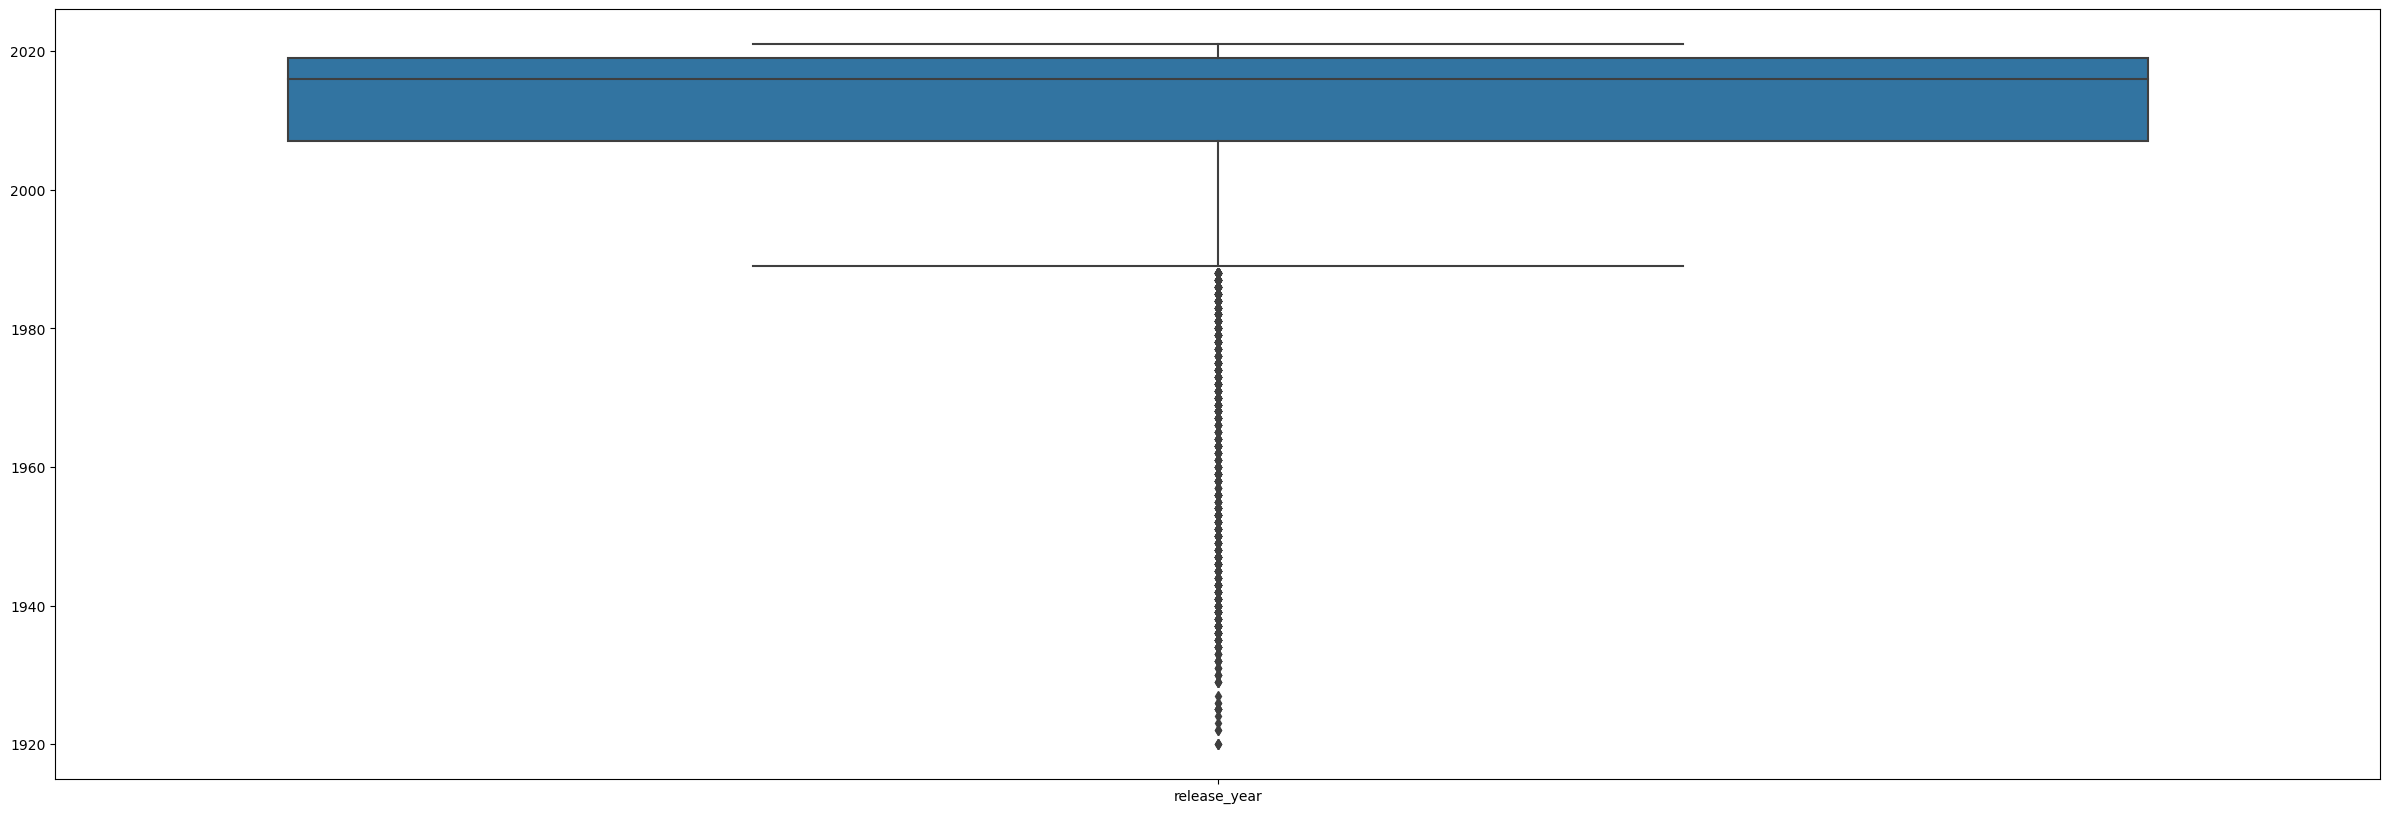

In [28]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df)

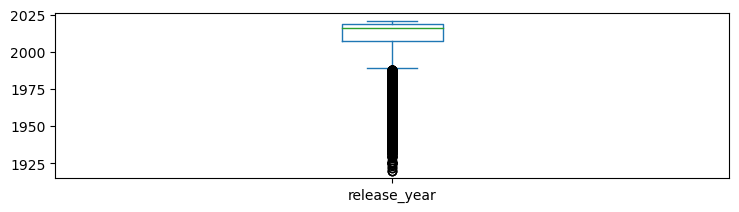

In [29]:
#checking outliers
#Outlier Search: This helps you to get some insights about the outliers in the data.
df.plot(kind='box',layout=(6,4),subplots=1,figsize=(40,15))
plt.show()

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   object        
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      7586 non-null   object        
 4   cast          8435 non-null   object        
 5   country       672 non-null    object        
 6   date_added    155 non-null    datetime64[ns]
 7   release_year  9668 non-null   int64         
 8   rating        9331 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  description   9668 non-null   object        
 12  year_added    155 non-null    float64       
 13  month_added   155 non-null    float64       
 14  season_count  9668 non-null   object        
dtypes: datetime64[ns](1), float64(2), int6

In [4]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


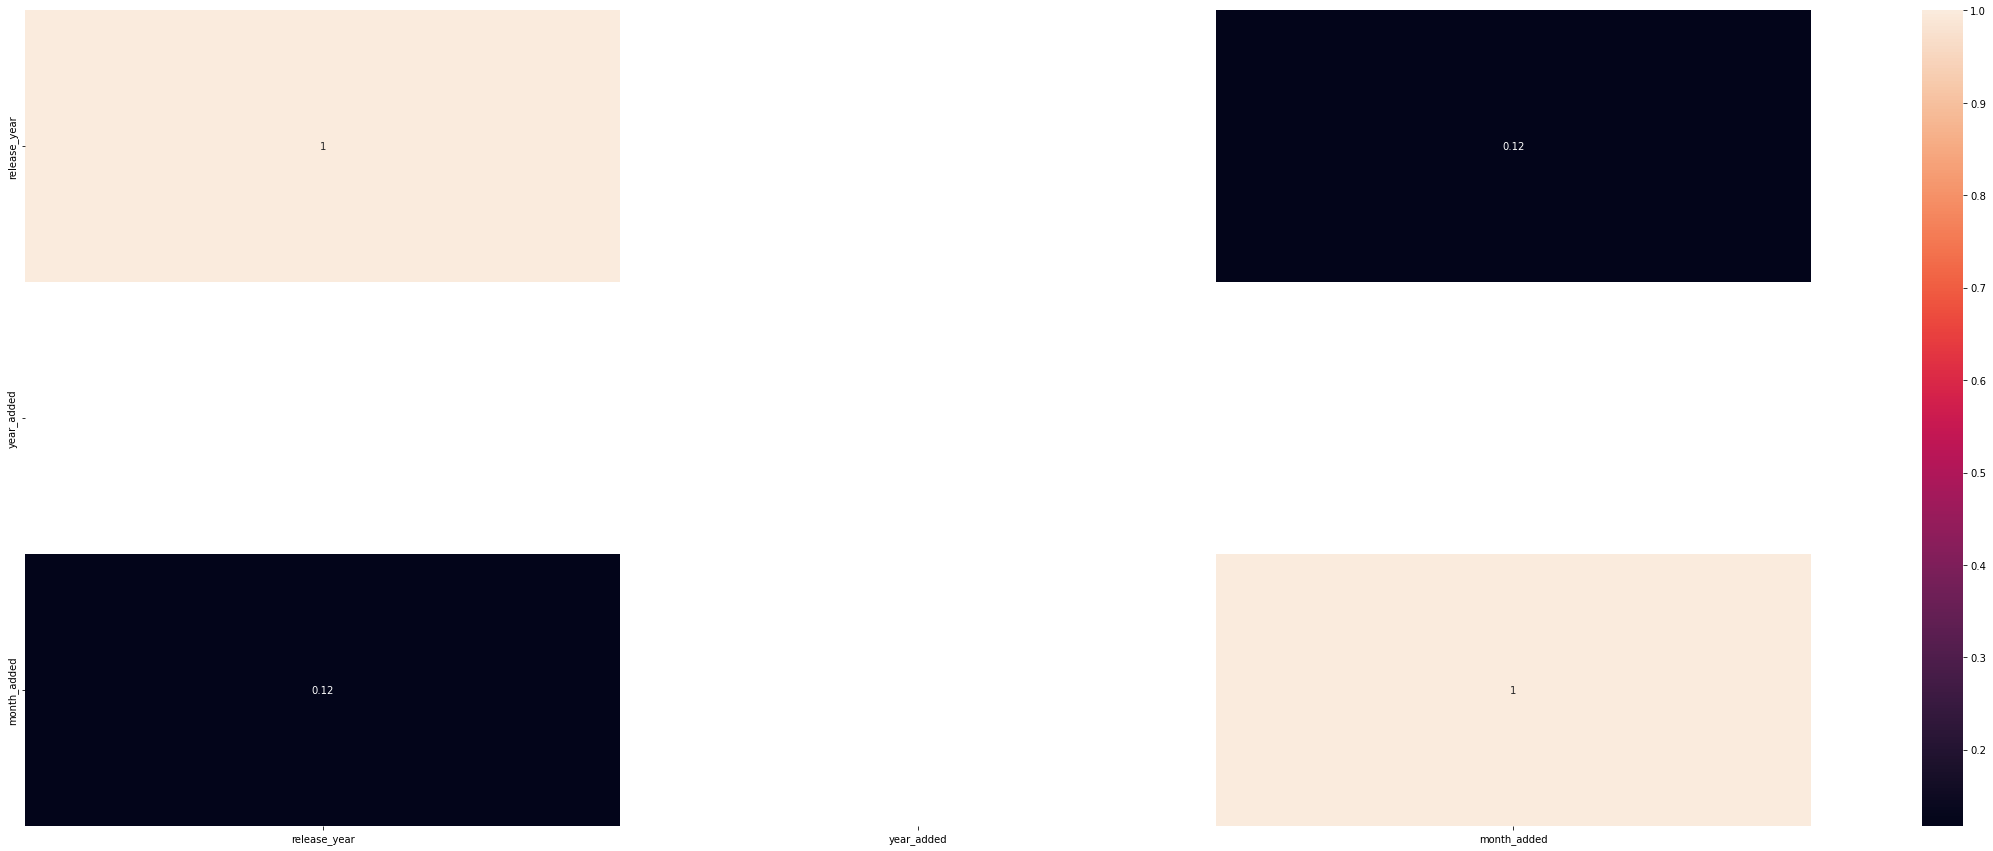

In [31]:
plt.figure(figsize=(40,15))
a=sns.heatmap(df.corr(),annot=True)

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# TO OBSERVE THE NUMBER OF MISSING ENTRIES IN THE DATASET

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

Data Cleaning
Here we will follow a few steps to make the data suitable for EDA:-

Drop the "show_id" column
Check for duplicate records of movies/TV shows and delete duplicates
Replace NaN values in "cast" and "director" columns with "Unavailable"
Replace NaN values in "rating" with mode of the column
As column "country" has many missing values, fill some of the missing entries based on genre of movies/shows.

Example:- for genre Anime - country can be filled in as "Japan" and for genre Western, we can fill in as "United States"

For missing values in "date_added", replace them with January 1st of {release year}
Convert "date_added" into datetime datatype

In [8]:
df.drop("show_id" , axis=1 , inplace=True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


# REMOVING DUPLICATES

In [9]:
df = df.drop_duplicates(["title"])
print("Duplicates removed")

Duplicates removed


In [10]:
df["cast"] = df["cast"].replace(np.nan , "Unavailable")
df["director"] = df["director"].replace(np.nan , "Unavailable")

In [11]:
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])

In [12]:
df=df.reset_index()
df.head()

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [13]:
df["date_added"] = df["date_added"].fillna("January 01, {}".format(str(df["release_year"].mode()[0])))

In [14]:
import re
months = {'January':1 , 'February':2 , 'March':3 , 'April':4 , 'May':5 , 'June':6 , 'July':7 , 'August':8 , 
          'September':9 , 'October':10 , 'November':11 , 'December':12}

date_list = []

for i in df["date_added"]:
    str1= re.findall('([a-zA-Z]+)\s[0-9]+\,\s[0-9]+' , i)
    str2= re.findall('[a-zA-Z]+\s([0-9]+)\,\s[0-9]+' , i)
    str3= re.findall('[a-zA-Z]+\s[0-9]+\,\s([0-9]+)' , i)
    dates = '{}-{}-{}'.format(str2[0] , months[str1[0]] , str3[0])
    date_list.append(dates)

In [15]:
df["date_added_cleaned"] = date_list


In [16]:
df['date_added_cleaned']=df['date_added_cleaned'].astype('datetime64[ns]')

In [17]:
for i , j in zip(df["country"].values , df.index):
    if i == np.nan:
        if (('Anime' in df.loc[j,'listed_in']) or ('anime' in df.loc[j,'listed_in'])):
            print(j)
            df.loc[j,'country'] ='Japan'
        elif (('Western' in df.loc[j,'listed_in']) or ('western' in df.loc[j,'listed_in'])):
            print(j)
            df.loc[j,'country'] ='United States'
        else:
            continue
    else:
        continue

In [18]:
df.head()

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_cleaned
0,0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,2021-03-30
1,1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,2021-03-30
2,2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,2021-03-30
3,3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",2021-03-30
4,4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,2021-03-30


### Now as we have cleaned data, we can proceed with analyzing this data

Exploratory Data Analysis
After analyzing the data, we can come up with the folowing questions:

What does each category in ratings define?
How many movies and TV shows does Amazon Prime have based on each category of the ratings?
Which is the highest watched rating categories in TV shows and movies?
What are the most watched category in each country?
Which is more popular on Prime? Movies or TV shows?
What was the focus of Prime on type of content in recent years?

In [19]:
df["rating"].unique()

array(['13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+', 'TV-PG',
       '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

#### what each of the above category defines:

13+ :This rating is a stronger caution for parents that content included may not be appropriate for children under 13 (pre-teen ages)

18+ or AGES18 :This rating signifies that the content is restricted to 18 years and over(adults)

16+ or AGES16 :This rating signifies that the content is restricted to 16 years and over

TV-MA :This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

TV-14 :This program contains some material that many parents would find unsuitable for children under 14 years of age.

TV-PG :This program contains material that parents may find unsuitable for younger children.

R :Under 17 requires accompanying parent or adult guardian,Parents are urged to learn more about the film before taking their young children with them.

PG-13 :Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.

NOT_RATE or UNRATED :If a film has not been submitted for a rating or is an uncut version of a film that was submitted

PG :Some material may not be suitable for children,May contain some material parents might not like for their young children.

TV-Y7 or 7+ :This program is designed for children age 7 and above.

TV-G :This program is suitable for all ages.

TV-Y :Programs rated TV-Y are designed to be appropriate for children of all ages. The thematic elements portrayed in programs with this rating are specifically designed for a very young audience, including children ages 2-6.

TV-Y7-FV :is recommended for ages 7 and older, with the unique advisory that the program contains fantasy violence.

G or ALL or ALL_AGES :All ages admitted. Nothing that would offend parents for viewing by children.

NC-17:No One 17 and Under Admitted. Clearly adult. Children are not admitted.

In [20]:
# We can combine the some ratings category to one single category 
# For Example:  NOT_RATE and UNRATED can be combined to say UNRATED

for i in df.index:
    if df.loc[i,"rating"]== "NOT_RATE":
        df.loc[i,"rating"] = "UNRATED"
    elif df.loc[i,"rating"]== "AGES_18_":
        df.loc[i,"rating"] = "18+"
    elif (df.loc[i,"rating"]== "AGES_16_") or (df.loc[i,"rating"]== "16"):
        df.loc[i,"rating"] = "16+"
    elif df.loc[i,"rating"]== "ALL_AGES":
        df.loc[i,"rating"] = "G"
    else:
        continue

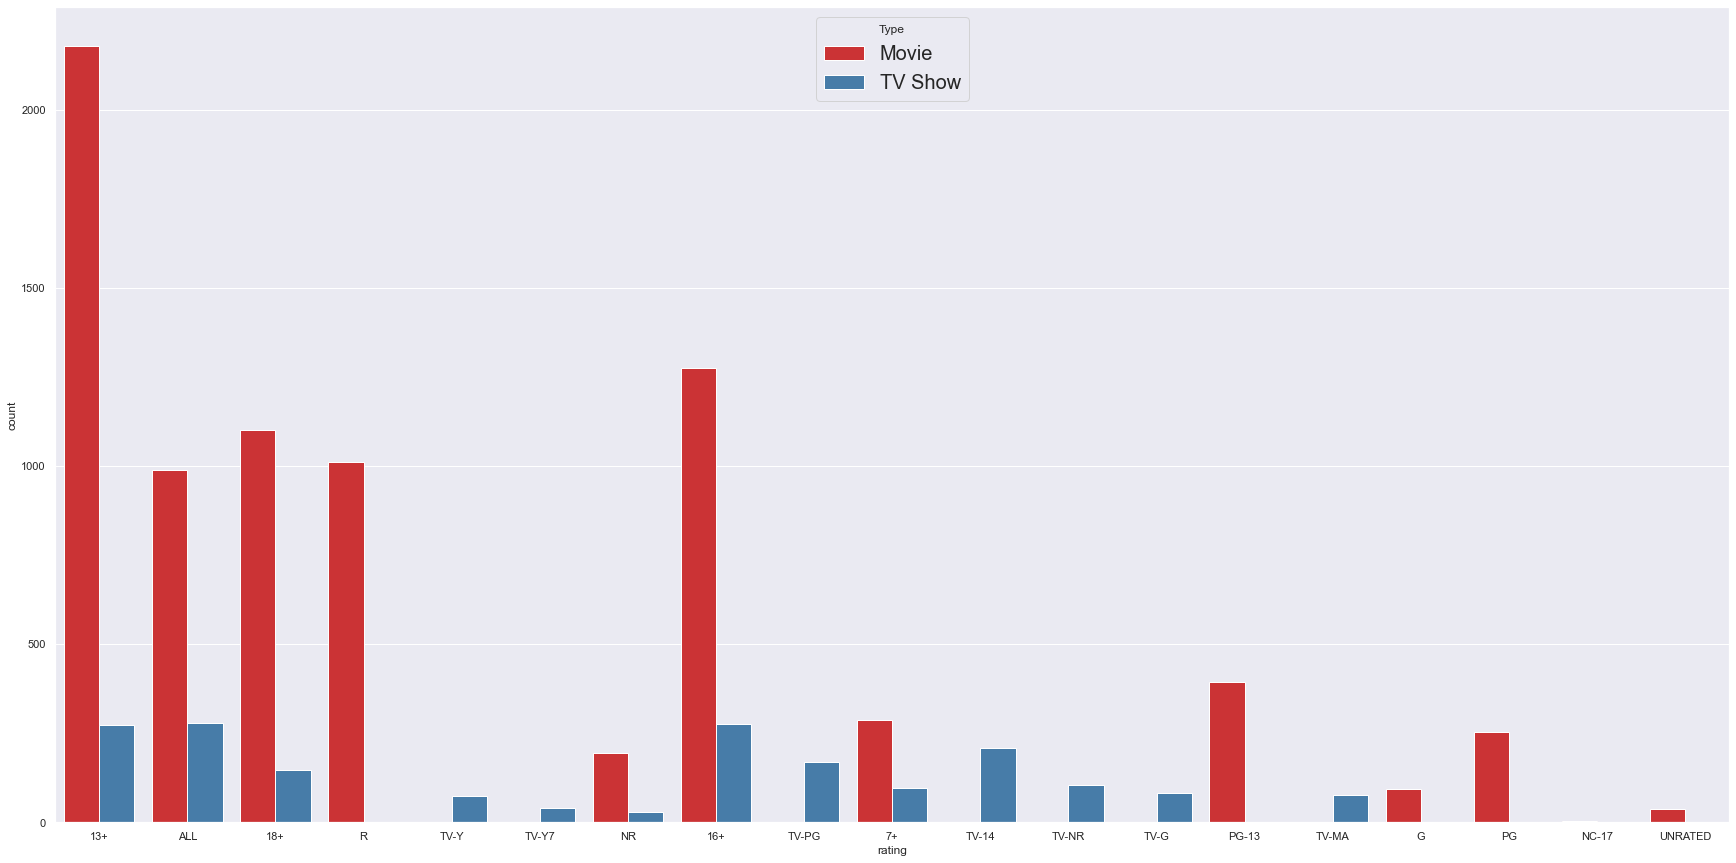

In [24]:
plt.figure(figsize=(30,15))
sns.set_theme(style="darkgrid")
sns.countplot(x="rating", hue="type" , data=df, palette="Set1")
plt.legend(loc='upper center', title="Type", fontsize=20)

## To find the most popular rating category


<AxesSubplot:>

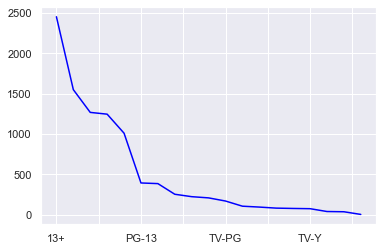

In [25]:
df["rating"].value_counts().plot(color = "blue")

### Distribution of Prime movies & shows across ratings

Text(0.5, 1.0, 'Distribution of Prime movies & shows across ratings')

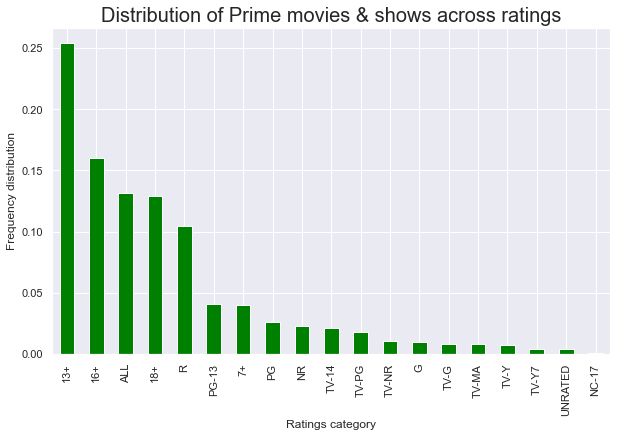

In [27]:
plt.figure(figsize=(10,6))
df["rating"].value_counts(normalize =True).plot(kind="bar", color = "green")
plt.xlabel("Ratings category")
plt.ylabel("Frequency distribution")
plt.title("Distribution of Prime movies & shows across ratings" , fontsize=20)

### Movies and shows of rating 13+ are more popular in Prime, followed by 16+ and others

In [28]:
df["country"].value_counts().sort_values(ascending=False)

United States                          253
India                                  229
United Kingdom                          28
Canada                                  16
United Kingdom, United States           12
                                      ... 
United States, Switzerland               1
United States, Germany, Italy            1
United States, United Arab Emirates      1
Iran, France                             1
Italy, Spain                             1
Name: country, Length: 86, dtype: int64

### we have group of countries as many entries, now focus on the top 4 countries for analysis

In [29]:
df_top4 = df[(df["country"]=="United States") | (df["country"]=="India") | (df["country"]=="United Kingdom") | 
             (df["country"]=="Canada")]
df_top4.head(10)

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_cleaned
0,0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,2021-03-30
1,1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,2021-03-30
2,2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,2021-03-30
3,3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",2021-03-30
4,4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,2021-03-30
5,5,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,13+,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...,2021-03-30
6,6,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,13+,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j...",2021-03-30
7,7,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,"March 30, 2021",2016,13+,131 min,Comedy,"This honest, uncompromising comedy chronicles ...",2021-03-30
8,8,Movie,Global Meltdown,Daniel Gilboy,"Michael Paré, Leanne Khol Young, Patrick J. Ma...",Canada,"March 30, 2021",2017,13+,87 min,"Action, Science Fiction, Suspense",A helicopter pilot and an environmental scient...,2021-03-30
9,9,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,"April 1, 2021",1994,13+,92 min,Drama,Sally Goodson is a devoted mother to her autis...,2021-01-04


### Comparing the content type available in top 4 countries

Text(0.5, 1.0, 'Comparing the content type available in top 4 countries')

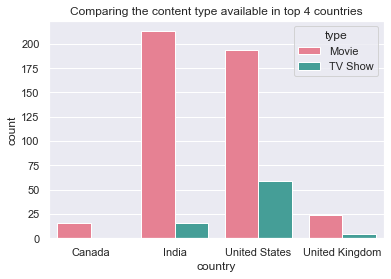

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x="country" , hue="type" , data=df_top4, palette="husl")
plt.title("Comparing the content type available in top 4 countries", fontsize=12)

## Distribution of rating-based movies and shows in top 4 countries

Text(0.5, 1.0, 'Distribution of rating-based movies and shows in top 4 countries')

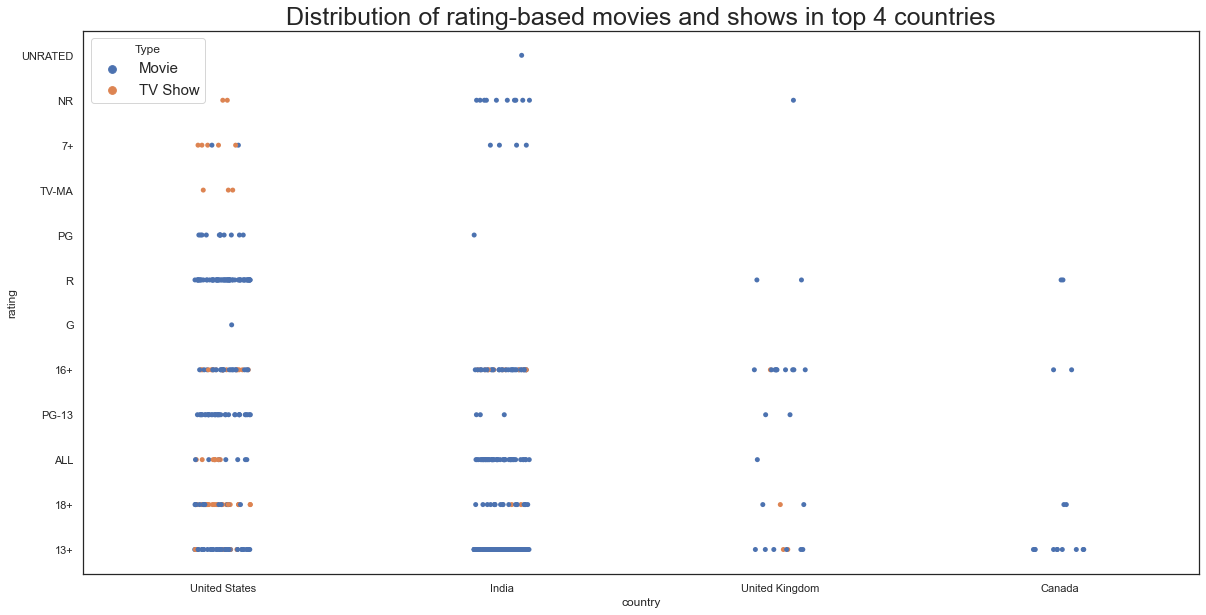

In [41]:
plt.figure(figsize=(20,10))
sns.set_theme(style = "white")
sns.stripplot(x="country" , y="rating" , hue="type", data=df_top4 , order=["United States" , "India" , "United Kingdom" , "Canada"])
plt.legend(loc="upper left" , title="Type" , fontsize=15)
plt.title("Distribution of rating-based movies and shows in top 4 countries", fontsize=25)

# 

In [42]:
df["type"].value_counts(normalize=True)

Movie      0.808233
TV Show    0.191767
Name: type, dtype: float64

In [43]:
df["year"]=df["date_added_cleaned"].dt.year
df.head()

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_cleaned,year
0,0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,2021-03-30,2021
1,1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,2021-03-30,2021
2,2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,2021-03-30,2021
3,3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",2021-03-30,2021
4,4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,2021-03-30,2021


In [44]:
df.groupby("year")["type"].value_counts(normalize=True)*100

year  type   
2021  Movie      80.823335
      TV Show    19.176665
Name: type, dtype: float64

In [23]:
## add new features in the dataset
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113,"Comedy, Drama",A small fishing village must procure a local d...,2021.0,3.0,
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,2021.0,3.0,
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,2021.0,3.0,
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,NaN,69,Documentary,"Pink breaks the mold once again, bringing her ...",2021.0,3.0,
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,2021.0,3.0,


# Content Type on Amazon Prime

In [37]:
df = pd.read_csv("amazon_prime_titles.csv")
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)


# Content from different Countries 

In [38]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
                 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
                  'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
                 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV', 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
                 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
                 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
                  'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v
    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


# Original Release Year of the movies

In [39]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


# what are the top catagories? 

In [40]:
col = "listed_in"
categories = ", ".join(d2['listed_in']).split(", ")
counter_list = Counter(categories).most_common(25)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Content added over the years", height=600, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

# Top Directors and Countries

In [7]:
countries = Counter(df.country)

In [8]:
topcountries = countries.most_common(10)

In [10]:
tc = px.bar(x = [i[0] for i in topcountries],y = [i[1] for i in topcountries],color=[i[1] for i in topcountries])
tc.update_layout(title = 'TOP COUNTRIES',xaxis_title = 'COUNTRIES',yaxis_title = 'Count')

In [41]:
directors = Counter(df.director)

In [42]:
topdirectors = directors.most_common(10)

In [43]:
td = px.bar(x = [i[0] for i in topdirectors],y = [i[1] for i in topdirectors],color=[i[1] for i in topdirectors])
td.update_layout(title = 'TOP DIRECTORS',xaxis_title = 'Directors',yaxis_title = 'No. of Shows/Movies')

# Top Cast 

In [44]:
cast = Counter(df.cast)

In [45]:
topcasts = cast.most_common(10)

In [46]:
tcast = px.bar(x = [i[0] for i in topcasts],y = [i[1] for i in topcasts],color=[i[1] for i in topcasts])
tcast.update_layout(title = 'TOP CASTS',xaxis_title = 'Name of Cast',yaxis_title = 'Count')

# Top Years 

In [47]:
ryear = Counter(df.release_year)

In [48]:
topry = ryear.most_common(10)

In [49]:
tyear = px.bar(x = [i[0] for i in topry],y = [i[1] for i in topry],color=[i[1] for i in topry],width = 1000)
tyear.update_layout(title = 'TOP YEARS',xaxis_title = 'Years',yaxis_title = 'Count')

# Top Movies Duration

In [50]:
movies = df.type == 'Movie'

In [51]:
md = Counter(df[movies].duration)

In [52]:
topmd = md.most_common(10)

In [53]:
mdt = px.bar(x = [i[0] for i in topmd],y = [i[1] for i in topmd],color=[i[1] for i in topmd],width = 1000)
mdt.update_layout(title = 'TOP MOVIES DURATION',xaxis_title = 'Duration',yaxis_title = 'Count')

# Top Shows Duration 

In [54]:
shows = df.type == 'TV Show'


In [55]:
sd = Counter(df[shows].duration)

In [56]:
topsd = sd.most_common(10)

In [57]:
sdt = px.bar(x = [i[0] for i in topsd],y = [i[1] for i in topsd],color=[i[1] for i in topsd],width = 1000)
sdt.update_layout(title = 'TOP SHOWS DURATION',xaxis_title = 'Duration',yaxis_title = 'Count')

# Top Genres

In [58]:
tl = Counter(df.listed_in)

In [59]:
topl = tl.most_common(10)

In [60]:
toplisted = px.bar(x = [i[0] for i in topl],y = [i[1] for i in topl],color=[i[1] for i in topl],width = 1000)
toplisted.update_layout(title = 'TOP Genres',xaxis_title = 'Genres',yaxis_title = 'Count')

# Top Ratings

In [61]:
tr = Counter(df.rating)

In [62]:
topr = tr.most_common(10)

In [63]:
toprating = px.bar(x = [i[0] for i in topr],y = [i[1] for i in topr],color=[i[1] for i in topr],width = 1000)
toprating.update_layout(title = 'TOP Ratings',xaxis_title = 'Rating Name',yaxis_title = 'Count')